## 4.4　勾配

　前回は、x<sub>0</sub>とx<sub>1</sub>の偏微分係数を個別に計算する関数を作成しました。今回は、まずx<sub>0</sub>とx<sub>1</sub>の偏微分係数をまとめて計算する関数を作成します。例えば、x<sub>0</sub>=3、x<sub>1</sub>=4の時の(x<sub>0</sub>,x<sub>1</sub>)の両方の偏微分係数を$\begin{pmatrix}\frac{ \partial f }{ \partial x } & \frac{ \partial f }{ \partial x }\end{pmatrix}$として計算することを考えます。
<br>なお、すべての変数の偏微分係数をベクトルとしてまとめたものを<font size="4" color="red">勾配(gradient)ベクトル</font>と言います。では実装してみましょう。 

In [3]:
import numpy as np

#ｆ：関数、ｘ：Numpy配列の引数をとる関数
def numerical_gradient(f,x):
    h=1e-4 #0.0001
    
    #xと同じ形状で全部ゼロの配列を作成
    grad = np.zeros_like(x)
    print("np.zeros_like(x)：")
    print(np.zeros_like(x))
    print("x.size：")
    print(x.size)
    
    #Nmpy配列xのサイズ（要素）分ループ
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)の計算
        x[idx] = tmp_val + h
        print("x+h：")
        print(x)
        fxh1 = f(x)
        print("f(x+h)：")
        print(fxh1)
        
        #f(x-h)の計算
        x[idx] = tmp_val - h
        print("x-h：")
        print(x)
        fxh2 = f(x)
        print("f(x-h)：")
        print(fxh2)
        
        #中心差分による数値微分
        grad[idx] = (fxh1 - fxh2) / (2*h)
        print("中心差分による数値微分（偏微分係数）→ (fxh1 - fxh2) / (2*h)：")
        print((fxh1 - fxh2) / (2*h))
        
        #値をもとに戻す
        x[idx] = tmp_val 

    print("勾配：")
    return grad

それでは、点(3,4),(0,2),(3,0)での勾配を求めてみましょう。
その前に、関数（モデル）\begin{eqnarray} f(x_0,x_1) = x_0^2 + x_1^2\end{eqnarray}を再定義します。

In [4]:
#関数再定義
def function_2(x):
    return x[0]**2 + x[1]**2

print("function_2([3.0,4.0]])：")
print(function_2(np.array([3.0,4.0])))
#print(function_2(np.array([0.0,2.0])))
#print(function_2(np.array([3.0,0.0])))

#勾配の計算
print(numerical_gradient(function_2,np.array([3.0,4.0])))
#print(numerical_gradient(function_2,np.array([0.0,2.0])))
#print(numerical_gradient(function_2,np.array([3.0,0.0])))

function_2([3.0,4.0]])：
25.0
np.zeros_like(x)：
[ 0.  0.]
x.size：
2
x+h：
[ 3.0001  4.    ]
f(x+h)：
25.00060001
x-h：
[ 2.9999  4.    ]
f(x-h)：
24.99940001
中心差分による数値微分（偏微分係数）→ (fxh1 - fxh2) / (2*h)：
6.0
x+h：
[ 3.      4.0001]
f(x+h)：
25.00080001
x-h：
[ 3.      3.9999]
f(x-h)：
24.99920001
中心差分による数値微分（偏微分係数）→ (fxh1 - fxh2) / (2*h)：
8.0
勾配：
[ 6.  8.]


※実際は、[6.000000000037801,799999999991189]という値が得られますが、[6. , 8.]として出力されます。これは、Numpy配列を出力するときには、数値が『見やすいように』整形して出力されるためです。
<br>
この例では、点(3,4)の勾配は(6,8)という結果になりましたが、この勾配は何を意味しているのでしょうか？それを理解するため\begin{eqnarray} f(x_0,x_1) = x_0^2 + x_1^2\end{eqnarray}の勾配を図で表してみることにします。

In [6]:
###jupyterとゼロディープで使うモジュールのある場所が異なるのでこのように章のディレクトリパスをはる
###パスは皆さんの環境に合せて書き換えてください
import sys
sys.path.append('C:\\Users\\satoshi\\Desktop\\DeepLearning_Study\\zero_DL\\ch04')

###メイン処理開始
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def function_3(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

##-2から2.5まで0.25刻みのデータを生成
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
#print(x0)

##配列の要素から格子列を生成する
X, Y = np.meshgrid(x0, x1)
#print(X,Y)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_3, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2.5])
plt.ylim([-2, 2.5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

np.zeros_like(x)：
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0

ValueError: could not broadcast input array from shape (2) into shape (324)

この図のように、勾配は関数$\begin{eqnarray} f(x_0,x_1) = x_0^2 + x_1^2\end{eqnarray}$の、一番低い場所を指す向きを持ったベクトルとして図示されます。正確に言うと、勾配が示す方向は、各場所（点）において関数の値を最も減らす方向を示します。これは重要なポイントです。

# 4.4.1 勾配法
　ニューラルネットワークも他の機械学習と同様に、学習の際に最適なパラメータ（重みとバイアス）を探索します。本書では、最適なパラメータを勾配を利用して損失関数関数の最小値を求めることで決定します（勾配法）。<br>
　ここでの注意点は、各地点において関数の値を最も減らす方向を示すのが勾配ということです。そのため、勾配が指す先が本当に関数の最小値なのか、またその方向が本当に進むべき方向なのかどうか保証することはできません。<br>
 関数の最小値、極小値<sub>※１</sub>、鞍点（saddle point）<sub>※2</sub>と呼ばれる場所では、勾配が0となりますので、必ずしも勾配=０が最小値であるとは限りません。<br>
　　※1：極小値とは、局所的な最小値。つまりある点に限定した場合に最小値となる点です。<br>
　　※2：鞍点とは、ある方向で見れば極大値で、ある方向で見れば極小値となる点です。<br>
　実際複雑な関数では、平らな土地に入り込み「プラトー」と呼ばれる学習が進まない停滞期に陥ってしまうことが多く、勾配の指す方向が最小値でない場合がほとんどです。

# 鞍点の話書きたい。プラトーとか。

　勾配の方向が最小値であるとは限らないにせよ、その方向に進むことで関数の値を最も減らすことができるため、勾配の情報を手掛かりに探索を行うべきでしょう。<br>
　勾配法では、現在の場所から勾配方向に一定の距離だけ進み、進んだ先でも同様に勾配を求めて同様に移動します。この作業を繰り返えすことで関数の値を徐々に減らしていきます。それでは勾配法を数式で表してみましょう。

\begin{eqnarray}x_0 = x_0 - \eta\frac{ \partial f }{ \partial x_0 }\end{eqnarray}<br>
\begin{eqnarray}x_1 = x_1 - \eta\frac{ \partial f }{ \partial x_1 }\end{eqnarray}<br>

　$\eta$(イータ)はニューラルネットの１回の学習におけるパラメータの更新量を表し学習率（learning tate）と呼ばれます。ニューラルネットではこのステップを繰り返すことで変数の値を更新していき関数の値を徐々に減らしていきます。<br>
　なお、学習率の値は0.01や0.001など前もって何らかの値を設定する必要があり、一般にこの値は大きすぎても小さすぎても、「良い場所」にたどり着くことができないと言われています。それでは、勾配降下法を実装してみましょう。

In [23]:
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        #１から10ステップまでのXの減少具合を表示
        if i < 5:
            print(str(i) + "回目のx")
            print(x)

        grad = numerical_gradient(f, x)
        
        #今回の勾配を表示
        if i < 5:
            print(str(i) + "回目のgrad")
            print(grad)
        
        x -= lr * grad
        
    return x


#先ほどのprint文がじゃまなので消したものを再定義
def numerical_gradient(f,x):
    h=1e-4 #0.0001
    
    #xと同じ形状で全部ゼロの配列を作成
    grad = np.zeros_like(x)
    
    #Nmpy配列xのサイズ（要素）分ループ
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
       
        #中心差分による数値微分
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        #値をもとに戻す
        x[idx] = tmp_val 

    return grad

 引数のfは最適化したい関数、init_xは初期値、lrはlearning rate（学習率）、step_numは勾配法による繰り返し回数です。関数の勾配をnumerical_gradient(f, x)で求め、その値に学習率を乗じた値で更新します。この関数を使えば関数の極小値を求めることができ、うまくいけば最小値を求めることができます。<br>
 それでは、$\begin{eqnarray} f(x_0,x_1) = x_0^2 + x_1^2\end{eqnarray}$の最小値（または極小値）を勾配法で求めてみましょう。

In [24]:
#def function_2(x):
#    return x[0]**2 + x[1]**2
#
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

0回目のx
[-3.  4.]
0回目のgrad
[-6.  8.]
1回目のx
[-2.4  3.2]
1回目のgrad
[-4.8  6.4]
2回目のx
[-1.92  2.56]
2回目のgrad
[-3.84  5.12]
3回目のx
[-1.536  2.048]
3回目のgrad
[-3.072  4.096]
4回目のx
[-1.2288  1.6384]
4回目のgrad
[-2.4576  3.2768]


array([ -6.11110793e-10,   8.14814391e-10])

　この例では、初期値を（-3.0,4.0）として、勾配法を使った最小値探索を行っています。最終結果は(-6.1e-10, 8.1e-10)となり、
真の最小値(0, 0)にほぼ近い結果を得ることができました。<br>
　なお、勾配法のプロセスを図示すると、以下の通り原点（最小値）に徐々に近づいていることが分かります。

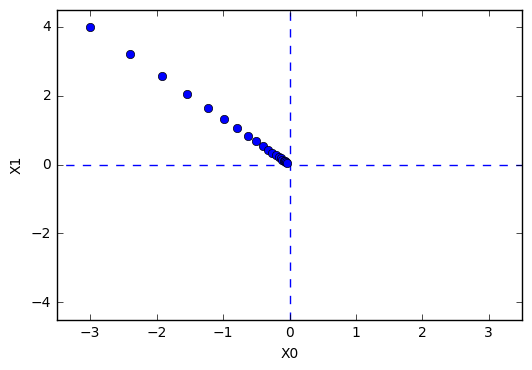

In [23]:
###jupyterとゼロディープで使うモジュールのある場所が異なるのでこのように章のディレクトリパスをはる
###パスは皆さんの環境に合せて書き換えてください
import sys
sys.path.append('C:\\Users\\satoshi\\Desktop\\DeepLearning_Study\\zero_DL\\ch04')

###メイン処理開始
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient

def gradient_descent_2(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent_2(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

 ここで、学習率が大きすぎる場合と小さすぎる場合に勾配法はどのような結果になるか実験してみましょう。

In [30]:
##学習率が大きすぎる場合
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [32]:
##学習率が小さすぎる場合
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

 このように、学習率が大きすぎると大きな値に発散してしまいますし、逆に学習率が小さすぎると、ほとんど更新されずに終わってしまいます。
つまり、適切な学習率を設定することが重要な問題となります。<br>
※学習率のようなパラメータは<b>ハイパーパラメータ</b>と言います。これはニューラルネットのパラメータ（重みやバイアス）とは性質の異なるパラメータです。ニューラルネットのパラメータは学習によって自動で獲得されるのに対し、ハイパーパラメータは人の手で設定する必要があります。<br><br>

# 4.4.2 ニューラルネットワークに対する勾配

　ニューラルネットワークに対する勾配とは、重みパラメータに関する損失関数の勾配です。例えば、2×3の重み$\boldsymbol{ W }$の損失関数$\boldsymbol{ L }$の勾配は
 <br>
 <br>
  \begin{eqnarray} \boldsymbol{ W } = \left(\begin{array}{cccc}
    w_{ 11 } & w_{ 21 } & w_{ 31 } \\
    w_{ 12 } & w_{ 22 } & w_{ 32 } \\
  \end{array}\right)\end{eqnarray}<br>
  \begin{eqnarray} \frac{ \partial L }{ \partial \boldsymbol{ W } } = \left(\begin{array}{cccc}
    \frac{ \partial L }{ \partial \boldsymbol{ w_{ 11 }  }} & \frac{ \partial L }{ \partial \boldsymbol{ w_{ 21 }  }} & \frac{ \partial L }{ \partial \boldsymbol{ w_{ 31 }  }} \\
    \frac{ \partial L }{ \partial \boldsymbol{ w_{ 12 }  }} & \frac{ \partial L }{ \partial \boldsymbol{ w_{ 22 }  }} & \frac{ \partial L }{ \partial \boldsymbol{ w_{ 32 }  }} \\
  \end{array}\right)\end{eqnarray}
  <br>
となります。<br>
　$\frac{ \partial L }{ \partial \boldsymbol{ W }}$の各要素はそれぞの要素に関する偏微分から構成されます。例えば、1行目1列の要素である$ \frac{ \partial L }{ \partial \boldsymbol{ w_{ 11 }  }}$はw<sub>11</sub>を少し変化させると損失関数$\boldsymbol{ L }$がどれだけ変化するかということを示しています。ここでは$\frac{ \partial L }{ \partial \boldsymbol{ W }}$の形状が、$\boldsymbol{ W }$と同じであるということです。<br>
　それでは、簡単なニューラルネットを例に実際に勾配を求める方法を実装します。

In [5]:
###jupyterとゼロディープで使うモジュールのある場所が異なるのでこのように章のディレクトリパスをはる
###パスは皆さんの環境に合せて書き換えてください
import sys, os
sys.path.append('C:\\Users\\satoshi\\Desktop\\DeepLearning_Study\\zero_DL\\')

##メイン処理（クラス宣言）
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        np.random.seed(20)
        #正規(ガウス)分布で初期化
        self.W = np.random.randn(2,3)
        #print("重みパラメータ（self.W）:")
        #print(self.W)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

　simpleNetというクラスですが、これは2×3の重みパラメータをひとつだけインスタンス変数として持ちます。また、予測するためのpredict(x)と
損失関数の値を求めるためのloss(x, t)の2つのメソッドがあります。lossメソッドのxには入力データ、tには正解ラベルが入力されます。<br>
　それでは、simpleNetを使ってみましょう。

In [6]:
#インスタンスの生成
net = simpleNet()
#print("netインスタンス:")
#print(net)

print("重みパラメータ（net.W）:")
print(net.W)#重みパラメータ（Self.Wと同値）

##これはスタート地点だから適当な値？？
x = np.array([0.6, 0.9])

#予測？⇒ｘとself.W(net.W)の内積（1×2と2×3の内積）
p = net.predict(x)
print("p:")
print(p)

##loss関数の中でやっていること：予測値ｐをsoftmax関数に入れている→出力を確率表現に
y = softmax(p)
print("softmax関数をかます：")
print(y)

np.argmax(p)#最大値のインデックス
print("最大インデックス：")
print(np.argmax(p))

t = np.array([0, 0, 1])#正解ラベル

##損失関数（交差エントロピー誤差）：今回正解（インデックス２）の出力は0.7650214なので
##損失関数の結果は -log0.7650214　となるはず。。
net.loss(x, t)
print("net.loss(x, t):")
print(net.loss(x, t))
print("-log0.7650214：")
print(-np.log(0.7650214))

#f = lambda w: net.loss(x, t)


重みパラメータ（net.W）:
[[ 0.88389311  0.19586502  0.35753652]
 [-2.34326191 -1.08483259  0.55969629]]
p:
[-1.57859985 -0.85883032  0.71824857]
softmax関数をかます：
[ 0.07694227  0.15803633  0.7650214 ]
最大インデックス：
2
net.loss(x, t):
0.267851467497
-log0.7650214：
0.267851471691


 続いて、勾配を求めます。

In [9]:
#勾配計算でやっていることの中身を見たいので。関数をそのままコピペしてpurint文を追加
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    ##x（net.W）にインデックスを振る
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    #ループ回数を表示する変数を定義
    i = 0 
    
    ##インデックス分（重み行列の各要素について以下を実行）
    while not it.finished:
        i = i + 1 
        print("＊＊＊＊＊＊＊" + str(i) + "回目のループ実行＊＊＊＊＊＊＊")
        
        ##該当インデックス番号を取り出し、その値をtmp_valに入れる
        idx = it.multi_index
        print("idx")
        print(idx)
        tmp_val = x[idx]
        print("tmp_val")
        print(tmp_val)
 
        ##その値をプラス方向に微小変化（ｈ）させた、重み行列を新たに用意して損失関数を計算
        x[idx] = float(tmp_val) + h
        print("x+h")
        print(x)
        fxh1 = f(x) # f(x+h)
        print("net.loss(x+h,t)の結果：")
        print(fxh1)
               
        ##その値をマイナス方向に微小変化（ｈ）させた、重み行列を新たに用意して損失関数を計算
        x[idx] = tmp_val - h 
        print("x-h")
        print(x)
        fxh2 = f(x) # f(x-h)
        print("net.loss(x-h,t)の結果：")
        print(fxh2)

        ##中心差分を取得する
        grad[idx] = (fxh1 - fxh2) / (2*h)
        print("中心差分による数値微分（偏微分係数）→ (fxh1 - fxh2) / (2*h)：")
        print((fxh1 - fxh2) / (2*h))

        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [10]:
##numerical_gradientの第一引数には関数を渡す必要があるためｆ（W）を定義
##Wはnet.Wと同値、ｘは上で定義した[0.6, 0.9]
##loss関数の中で、predictとsoftmax（確率っぽい表記に）とcross_entopy_errorを計算して交差エントロピー誤差を返す
def f(W):
    return net.loss(x, t)

#####上記の関数再定義は以下のようにも書ける。######
#f = lambda w : net.loss(x, t)

##上記の損失関数に各重みの値±hを渡して、計算結果の中心差分を取る（＝勾配計算：ここを理解したい）
dW = numerical_gradient(f, net.W)
print("************勾配結果*************")
print(dW)

＊＊＊＊＊＊＊1回目のループ実行＊＊＊＊＊＊＊
idx
(0, 0)
tmp_val
0.883893112617
x+h
[[ 0.88399311  0.19586502  0.35753652]
 [-2.34326191 -1.08483259  0.55969629]]
net.loss(x+h,t)の結果：
0.267856084161
x-h
[[ 0.88379311  0.19586502  0.35753652]
 [-2.34326191 -1.08483259  0.55969629]]
net.loss(x-h,t)の結果：
0.267846851089
中心差分による数値微分（偏微分係数）→ (fxh1 - fxh2) / (2*h)：
0.0461653617245
＊＊＊＊＊＊＊2回目のループ実行＊＊＊＊＊＊＊
idx
(0, 1)
tmp_val
0.195865022038
x+h
[[ 0.88389311  0.19596502  0.35753652]
 [-2.34326191 -1.08483259  0.55969629]]
net.loss(x+h,t)の結果：
0.267860949916
x-h
[[ 0.88389311  0.19576502  0.35753652]
 [-2.34326191 -1.08483259  0.55969629]]
net.loss(x-h,t)の結果：
0.267841985557
中心差分による数値微分（偏微分係数）→ (fxh1 - fxh2) / (2*h)：
0.0948217964034
＊＊＊＊＊＊＊3回目のループ実行＊＊＊＊＊＊＊
idx
(0, 2)
tmp_val
0.357536515885
x+h
[[ 0.88389311  0.19586502  0.35763652]
 [-2.34326191 -1.08483259  0.55969629]]
net.loss(x+h,t)の結果：
0.267837369105
x-h
[[ 0.88389311  0.19586502  0.35743652]
 [-2.34326191 -1.08483259  0.55969629]]
net.loss(x-h,t)の結果：
0.267865566537


このようにnumerical_gradient(f,x)の結果は、２×３次元の配列になります。勾配の計算結果を見ると、例えばＷ<sub>11</sub>はおよそ0.04ということで、Ｗ<sub>11</sub>をhだけ増やすと損失関数の値は0.04hだけ増加するということを意味します。また、Ｗ<sub>32</sub>は、およそ-0.2ですので、これは損失関数の値を-0.2hだけ減らすというこです。つまり、損失関数を減少するという観点からはＷ<sub>11</sub>はマイナスに、Ｗ<sub>32</sub>はプラスに影響するということです。また更新度合についてもＷ<sub>31</sub>よりもＷ<sub>32</sub>のほうが大きく貢献することもわかります。

# 行列の偏微分について書きたい